## Step 1 : verifying the file directory 

In [9]:
import os

# Set working directory to your actual folder
os.chdir(r"C:\Users\aravi\Videos\project results\statistics")

# Confirm it's set
print("Current working directory:", os.getcwd())




Current working directory: C:\Users\aravi\Videos\project results\statistics


## Step 2 : Sample Directory

In [11]:
import pandas as pd

# Load Roman data
roman_df = pd.read_csv("rome alpha_diversity_results.csv")

# Load Viking/Anglo data
viking_df = pd.read_csv("vikinganglo alpha_diversity_results.csv")





## Step 3 : making sure the sample files are accessible 

In [13]:
print("Roman data preview:")
print(roman_df.head())

print("\nViking/Anglo data preview:")
print(viking_df.head())



Roman data preview:
       sample  alpha_diversity
0  ERR1329825         4.070656
1  ERR1329829         4.327820
2  ERR1329834         3.936260
3  ERR1329842         4.391893
4  ERR1329846         4.363713

Viking/Anglo data preview:
       sample  alpha_diversity
0  ERR1329827         4.315824
1  ERR1329830         4.726227
2  ERR1329832         4.103910
3  ERR1329836         3.970573
4  ERR1329838         2.750000


## step 4: Testing for normality using Shapiro-wilk test

In [21]:
from scipy.stats import shapiro

def test_normality(data, label):
    stat, p = shapiro(data)
    print(f"{label} Shapiro-Wilk Test:")
    print(f"  W-statistic = {stat:.4f}")
    print(f"  p-value     = {p:.4f}")
    if p > 0.05:
        print(" Data appears normally distributed.\n")
    else:
        print(" Data is not normally distributed.\n")

# Running for both groups
test_normality(roman_df['alpha_diversity'], "Roman")
test_normality(viking_df['alpha_diversity'], "Viking/Anglo")



Roman Shapiro-Wilk Test:
  W-statistic = 0.7802
  p-value     = 0.0121
 Data is not normally distributed.

Viking/Anglo Shapiro-Wilk Test:
  W-statistic = 0.8639
  p-value     = 0.2030
 Data appears normally distributed.



## step 5 : since, noramlity failed for roman sample, we will go for mann-whitney U test

In [19]:
from scipy.stats import mannwhitneyu

def compare_groups_nonparametric(group1, group2, label1, label2):
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print("Mann–Whitney U Test:")
    print(f"  U-statistic = {stat:.4f}")
    print(f"  p-value     = {p:.4f}")
    if p < 0.05:
        print(f"   Significant difference between {label1} and {label2}.\n")
    else:
        print(f"   No significant difference between {label1} and {label2}.\n")

compare_groups_nonparametric(
    roman_df['alpha_diversity'],
    viking_df['alpha_diversity'],
    "Roman",
    "Viking/Anglo"
)



Mann–Whitney U Test:
  U-statistic = 27.0000
  p-value     = 1.0000
   No significant difference between Roman and Viking/Anglo.



##step 6: Plotting Bar plot by using alpha diversity

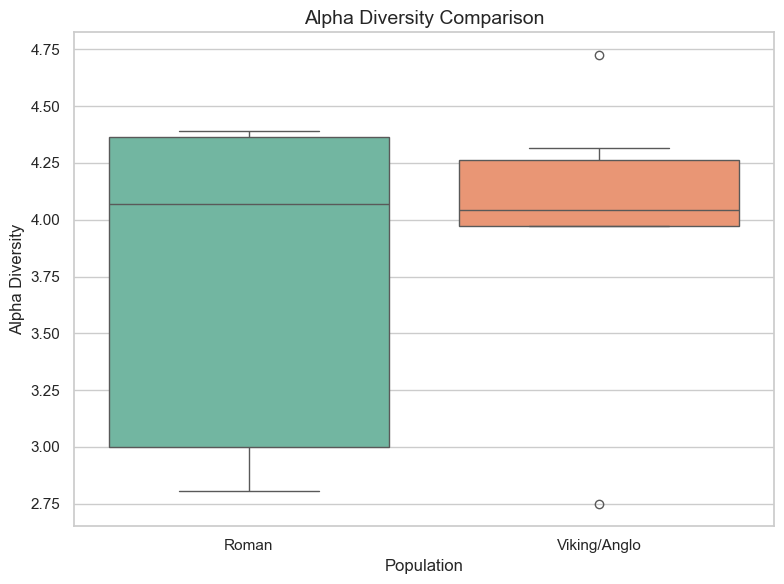

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine datasets with group labels
roman_df['group'] = 'Roman'
viking_df['group'] = 'Viking/Anglo'
combined_df = pd.concat([roman_df, viking_df], ignore_index=True)

# Set plot style
sns.set(style="whitegrid")

# Create boxplot with hue to fix warning
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='group',
    y='alpha_diversity',
    hue='group',
    data=combined_df,
    palette='Set2',
    dodge=False
)

# Add title and labels
plt.title("Alpha Diversity Comparison", fontsize=14)
plt.xlabel("Population", fontsize=12)
plt.ylabel("Alpha Diversity", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

